<a href="https://colab.research.google.com/github/drcfsorg/Pokhara_ML_Bootcamp/blob/master/model_validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://raw.githubusercontent.com/amit-timalsina/model-validation-tutorial/master/datasets/winequality-red.csv winequality.csv

--2023-05-31 11:44:25--  https://raw.githubusercontent.com/amit-timalsina/model-validation-tutorial/master/datasets/winequality-red.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 100951 (99K) [text/plain]
Saving to: ‘winequality-red.csv’

winequality-red.csv 100%[===================>]  98.58K  --.-KB/s    in 0.009s  

2023-05-31 11:44:25 (10.7 MB/s) - ‘winequality-red.csv’ saved [100951/100951]

--2023-05-31 11:44:25--  http://winequality.csv/
Resolving winequality.csv (winequality.csv)... failed: Name or service not known.
wget: unable to resolve host address ‘winequality.csv’
FINISHED --2023-05-31 11:44:25--
Total wall clock time: 0.3s
Downloaded: 1 files, 99K in 0.009s (10.7 MB/s)


In [ ]:
import pandas as pd
df = pd.read_csv("winequality-red.csv")

In [ ]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
# a mapping dictionary that maps the quality values from 0 to 5
quality_mapping = {
  3: 0,
  4: 1,
  5: 2,
  6: 3,
  7: 4,
  8: 5
}
# you can use the map function of pandas with
# any dictionary to convert the values in a given
# column to values in the dictionary
df.loc[:, "quality"] = df.quality.map(quality_mapping)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
# use sample with frac=1 to shuffle the dataframe
# we reset the indices since they change after
# shuffling the dataframe
df.sample(frac=1).reset_index(drop=True, inplace=True)

# top 1000 rows are selected for training
df_train = df.head(1000)

# bottom 599 rows are selected for testing/validation
df_test = df.tail(599)

In [ ]:
# import from scikit-learn
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# intialize decision tree classifier
# with a max_depth of 3
clf = DecisionTreeClassifier(max_depth=3)

# choose the columns you want to train on
# these are the features for the model
cols = df_train.columns.drop("quality")

# train the model on the provided features
# and mapped quality from before
clf.fit(df_train[cols], df_train.quality)

DecisionTreeClassifier(max_depth=3)

In [ ]:
# generate predictions on the training set
train_predictions = clf.predict(df_train[cols])

# generate predictions on the test set
test_predictions = clf.predict(df_test[cols])

# calculate the accuracy of predictions on the training data set
train_accuracy = metrics.accuracy_score(
    df_train.quality, train_predictions
)

# calculate the accuracy of predictions on test data set
test_accuracy = metrics.accuracy_score(
    df_test.quality, test_predictions
)

In [ ]:
train_accuracy

0.58

In [ ]:
test_accuracy

0.5392320534223706

In [ ]:
# intialize decision tree classifier
# with a max_depth of 3
clf = DecisionTreeClassifier(max_depth=7)

# train the model on the provided features
# and mapped quality from before
clf.fit(df_train[cols], df_train.quality)

# generate predictions on the training set
train_predictions = clf.predict(df_train[cols])

# generate predictions on the test set
test_predictions = clf.predict(df_test[cols])

# calculate the accuracy of predictions on the training data set
train_accuracy = metrics.accuracy_score(
    df_train.quality, train_predictions
)

# calculate the accuracy of predictions on test data set
test_accuracy = metrics.accuracy_score(
    df_test.quality, test_predictions
)

In [ ]:
train_accuracy, test_accuracy

(0.794, 0.5008347245409015)

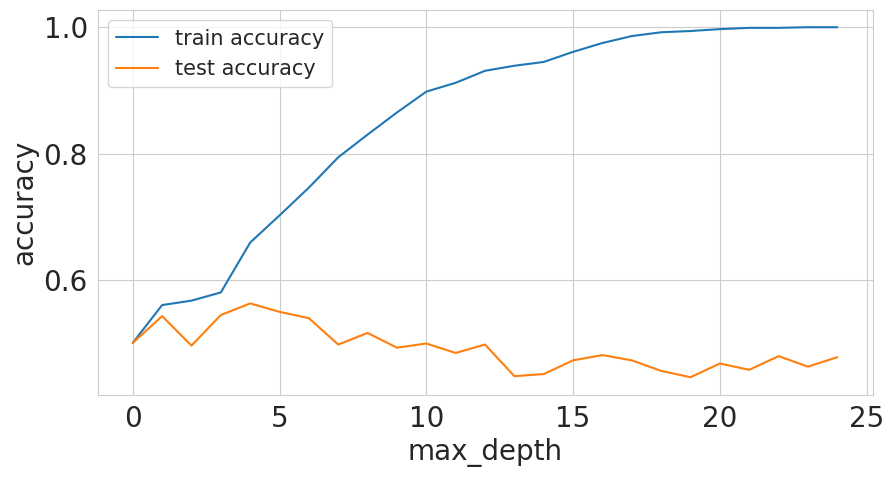

In [ ]:
# import matplotlib and seaborn for plotting
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# this is our global size of label text
# on the plots
matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)

# This line ensures that the plot is displayed
# inside the notebook
%matplotlib inline

# initialize lists to store accuracies
# for training and test data
# we start with 50% accuracy
train_accuracies = [0.5]
test_accuracies = [0.5]

# iterate over a few depth values
for depth in range(1, 25):
    # init the model
    clf = DecisionTreeClassifier(max_depth=depth)

    # fit the model on given features
    clf.fit(df_train[cols], df_train.quality)

    # create training & test predictions
    train_predictions = clf.predict(df_train[cols])
    test_predictions = clf.predict(df_test[cols])

    # calculate training & test accuracies
    train_accuracy = metrics.accuracy_score(
        df_train.quality, train_predictions
    )

    test_accuracy = metrics.accuracy_score(
        df_test.quality, test_predictions
    )

    # append accuracies
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# create two plots using matplotlib adn seaborn
plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")
plt.plot(train_accuracies, label="train accuracy")
plt.plot(test_accuracies, label="test accuracy")
plt.legend(loc="upper left", prop={'size': 15})
plt.xticks(range(0, 26, 5))
plt.xlabel("max_depth", size=20)
plt.ylabel("accuracy", size=20)
plt.show()

In [ ]:
from sklearn import model_selection

In [ ]:
df_0 = df.copy()

In [ ]:
df_0.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2


In [ ]:
# We create a new column called kfold and fill it with -1
df_0["kfold"] = -1

# the next step is to randomize the rows of the data
df_0 = df_0.sample(frac=1).reset_index(drop=True)

# initiate the kfold class from model_selection module
kf = model_selection.KFold(n_splits=5)

# fill the new kfold column
for fold, (trn_, val_) in enumerate(kf.split(X=df_0)):
    df_0.loc[val_, "kfold"] = fold

In [ ]:
df_0

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,kfold
0,10.1,0.270,0.54,2.3,0.065,7.0,26.0,0.99531,3.17,0.53,12.5,3,0
1,11.3,0.360,0.66,2.4,0.123,3.0,8.0,0.99642,3.20,0.53,11.9,3,0
2,5.6,0.500,0.09,2.3,0.049,17.0,99.0,0.99370,3.63,0.63,13.0,2,0
3,6.9,0.540,0.30,2.2,0.088,9.0,105.0,0.99725,3.25,1.18,10.5,3,0
4,9.0,0.800,0.12,2.4,0.083,8.0,28.0,0.99836,3.33,0.65,10.4,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,7.7,0.705,0.10,2.6,0.084,9.0,26.0,0.99760,3.39,0.49,9.7,2,4
1595,6.7,0.460,0.24,1.7,0.077,18.0,34.0,0.99480,3.39,0.60,10.6,3,4
1596,6.8,0.660,0.07,1.6,0.070,16.0,61.0,0.99572,3.29,0.60,9.3,2,4
1597,8.0,0.420,0.17,2.0,0.073,6.0,18.0,0.99720,3.29,0.61,9.2,3,4


Text(0, 0.5, 'count')

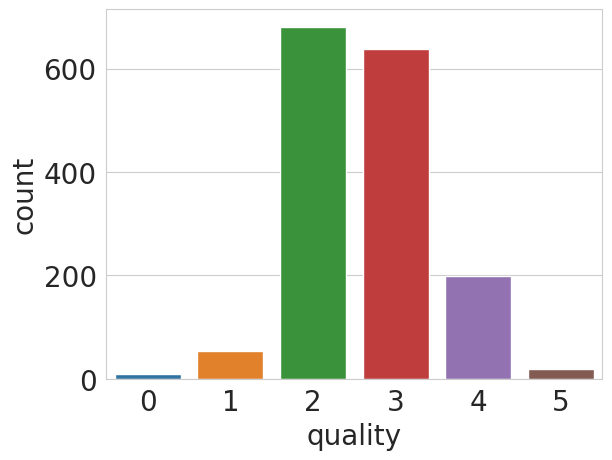

In [ ]:
b = sns.countplot(x='quality', data=df)
b.set_xlabel("quality", fontsize=20)
b.set_ylabel("count", fontsize=20)

In [ ]:
train_fold_0 = df_0.loc[df_0["kfold"] != 0]
val_fold_0 = df_0.loc[df_0["kfold"] == 0]


Text(0, 0.5, 'count')

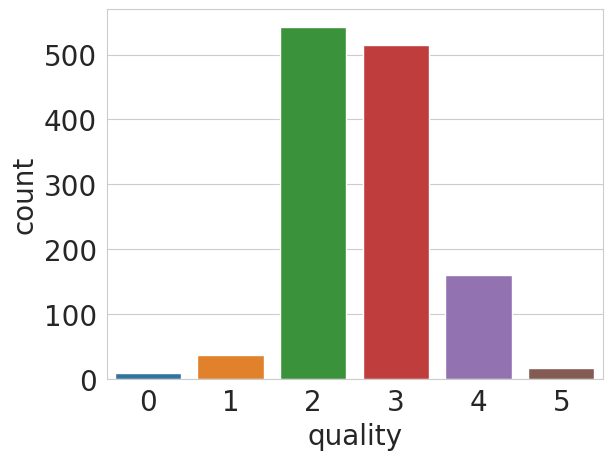

In [ ]:
b = sns.countplot(x='quality', data=train_fold_0)
b.set_xlabel("quality", fontsize=20)
b.set_ylabel("count", fontsize=20)

Text(0, 0.5, 'count')

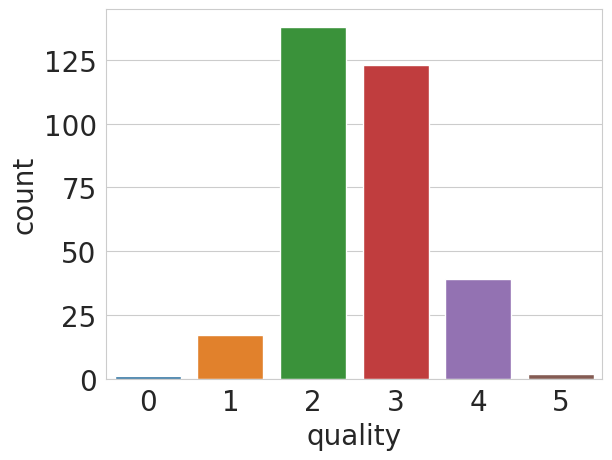

In [ ]:
b = sns.countplot(x='quality', data=val_fold_0)
b.set_xlabel("quality", fontsize=20)
b.set_ylabel("count", fontsize=20)

In [ ]:
df_1 = df.copy()

In [ ]:
# We create a new column called kfold and fill it with -1
df_1["kfold"] = -1

# the next step is to randomize the rows of the data
df_1 = df.sample(frac=1).reset_index(drop=True)

# fetch targets
y = df_1.quality.values

# initiate the StratifiedKFold class from model_selection module
kf = model_selection.StratifiedKFold(n_splits=5)

# fill the new kfold column
for fold, (trn_, val_) in enumerate(kf.split(X=df_1, y=y)):
    df_1.loc[val_, "kfold"] = fold

In [ ]:
df_1


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,kfold
0,8.3,0.675,0.26,2.1,0.084,11.0,43.0,0.99760,3.31,0.53,9.2,1,0.0
1,7.2,0.660,0.03,2.3,0.078,16.0,86.0,0.99743,3.53,0.57,9.7,2,0.0
2,6.5,0.580,0.00,2.2,0.096,3.0,13.0,0.99557,3.62,0.62,11.5,1,0.0
3,12.3,0.390,0.63,2.3,0.091,6.0,18.0,1.00040,3.16,0.49,9.5,2,0.0
4,6.0,0.420,0.19,2.0,0.075,22.0,47.0,0.99522,3.39,0.78,10.0,3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,8.0,0.600,0.08,2.6,0.056,3.0,7.0,0.99286,3.22,0.37,13.0,2,4.0
1595,7.1,0.660,0.00,2.4,0.052,6.0,11.0,0.99318,3.35,0.66,12.7,4,4.0
1596,7.8,0.340,0.37,2.0,0.082,24.0,58.0,0.99640,3.34,0.59,9.4,3,4.0
1597,8.9,0.620,0.18,3.8,0.176,52.0,145.0,0.99860,3.16,0.88,9.2,2,4.0


Text(0, 0.5, 'count')

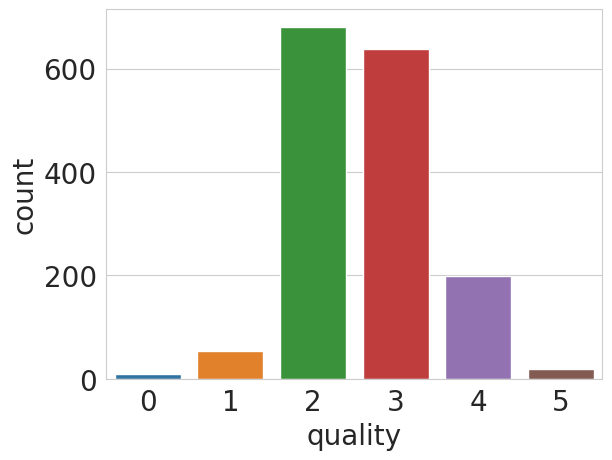

In [ ]:
b = sns.countplot(x='quality', data=df)
b.set_xlabel("quality", fontsize=20)
b.set_ylabel("count", fontsize=20)

In [ ]:
train_fold_0 = df_1.loc[df_1["kfold"] != 0]
val_fold_0 = df_1.loc[df_1["kfold"] == 0]


Text(0, 0.5, 'count')

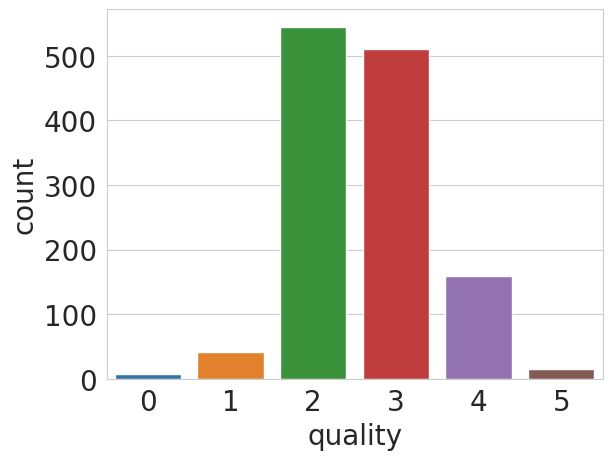

In [ ]:
b = sns.countplot(x='quality', data=train_fold_0)
b.set_xlabel("quality", fontsize=20)
b.set_ylabel("count", fontsize=20)

Text(0, 0.5, 'count')

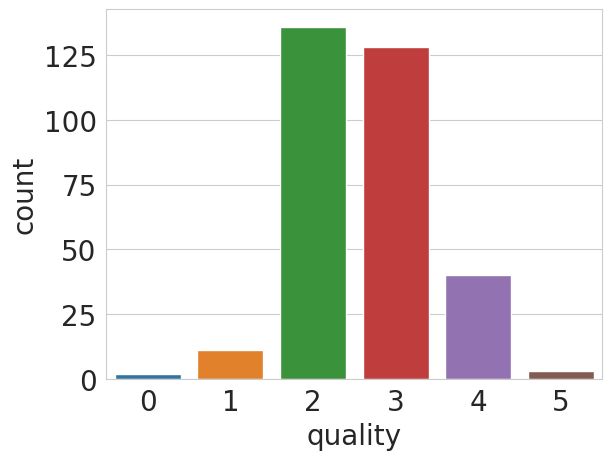

In [ ]:
b = sns.countplot(x='quality', data=val_fold_0)
b.set_xlabel("quality", fontsize=20)
b.set_ylabel("count", fontsize=20)

# Evaluation metric

In [ ]:
def accuracy(y_true, y_pred):
    """
    Function to calculate accuracy
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: accuracy score
    """
    # initialize a simple counter for correct predictions
    correct_counter = 0
    # loop over all elements of y_true
    # and y_pred "together"
    for yt, yp in zip(y_true, y_pred):
        if yt == yp:
            # if prediction is equal to truth, increase the counter
            correct_counter += 1
        # return accuracy
        # which is correct predictions over the number of samples
    return correct_counter / len(y_true)

In [ ]:
from sklearn import metrics

l1 = [0, 1, 1, 0, 1, 0]
l2 = [1, 1, 1, 1, 0, 0]

metrics.accuracy_score(l1, l2)

0.5

In [ ]:
def true_positive(y_true, y_pred):
    """
    Function to calculate True Positives
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: number of true positives
    """
    # initialize
    tp = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 1 and yp == 1:
            tp += 1
    return tp

def true_negative(y_true, y_pred):
    """
    Function to calculate True Negatives
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: number of true negatives
    """
    # initialize
    tn = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 0 and yp == 0:
            tn += 1
    return tn

def false_positive(y_true, y_pred):
    """
    Function to calculate False Positives
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: number of false positives
    """
    # initialize
    fp = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 0 and yp == 1:
            fp += 1
    return fp

def false_negative(y_true, y_pred):
    """
    Function to calculate False Negatives
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: number of false negatives
    """
    # initialize
    fn = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 1 and yp == 0:
            fn += 1
    return fn

In [ ]:
l1 = [0, 1, 1, 0, 1, 0]
l2 = [1, 1, 1, 1, 0, 0]

In [ ]:
true_positive(l1, l2)

2

In [ ]:
false_positive(l1, l2)

2

In [ ]:
false_negative(l1, l2)

1

In [ ]:
true_negative(l1, l2)

1

In [ ]:
def accuracy_v2(y_true, y_pred):
    """
    Function to calculate accuracy using tp/tn/fp/fn
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: accuracy score
    """
    tp = true_positive(y_true, y_pred)
    fp = false_positive(y_true, y_pred)
    fn = false_negative(y_true, y_pred)
    tn = true_negative(y_true, y_pred)
    accuracy_score = (tp + tn) / (tp + tn + fp + fn)
    return accuracy_score

In [ ]:
l1 = [0, 1, 1, 0, 1, 0]
l2 = [1, 1, 1, 1, 0, 0]

In [ ]:
accuracy(l1, l2)

0.5

In [ ]:
accuracy_v2(l1, l2)

0.5

In [ ]:
metrics.accuracy_score(l1, l2)

0.5

In [ ]:
def precision(y_true, y_pred):
    """
    Function to calculate precision
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: precision score
    """
    tp = true_positive(y_true, y_pred)
    fp = false_positive(y_true, y_pred)
    precision = tp / (tp+fp)
    return precision

In [ ]:
l1 = [0, 1, 1, 0, 1, 0]
l2 = [1, 1, 1, 1, 0, 0]

In [ ]:
precision(l1, l2)

0.5

In [ ]:
def recall(y_true, y_pred):
    """
    Function to calculate recall
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: recall score
    """
    tp = true_positive(y_true, y_pred)
    fn = false_negative(y_true, y_pred)
    recall = tp / (tp+fn)
    return recall

In [ ]:
l1 = [0, 1, 1, 0, 1, 0]
l2 = [1, 1, 1, 1, 0, 0]

In [ ]:
recall(l1, l2)

0.6666666666666666